# Libraries Used

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
print("Setup complete!")

Setup complete!


# Data Cleaning

In [2]:
dfTrain=pd.read_csv("Train.csv")
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
dfTrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
duplicate = dfTrain.duplicated()
duplicate.sum()

0

# Univariate analysis and Treatement of Outliers

In [6]:
dfTrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

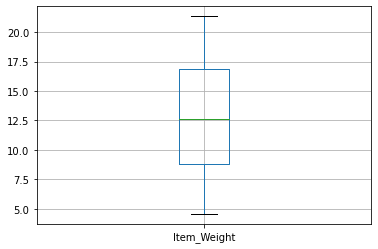

In [7]:
dfTrain.boxplot(column=['Item_Weight'])

<AxesSubplot:>

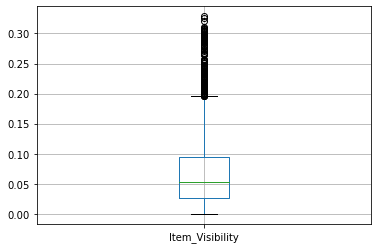

In [8]:
dfTrain.boxplot(column=['Item_Visibility'])

In [9]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [10]:
lowItem_Visibility,uppItem_Visibility=remove_outlier(dfTrain['Item_Visibility'])
dfTrain['Item_Visibility'] = np.where(dfTrain['Item_Visibility']>uppItem_Visibility,uppItem_Visibility,dfTrain['Item_Visibility'])              
dfTrain['Item_Visibility'] = np.where(dfTrain['Item_Visibility']<lowItem_Visibility,lowItem_Visibility,dfTrain['Item_Visibility'])   

<AxesSubplot:>

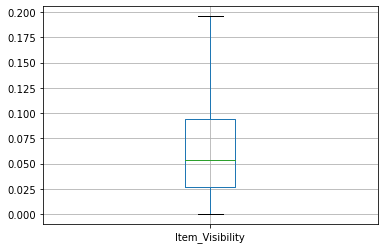

In [11]:
dfTrain.boxplot(column=['Item_Visibility'])

<AxesSubplot:>

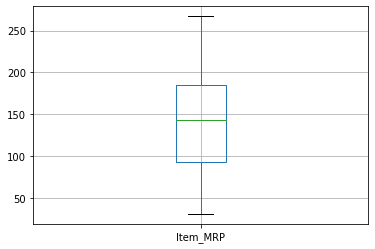

In [12]:
dfTrain.boxplot(column=['Item_MRP'])

<AxesSubplot:>

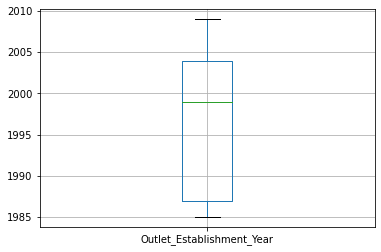

In [13]:
dfTrain.boxplot(column=['Outlet_Establishment_Year'])

<AxesSubplot:>

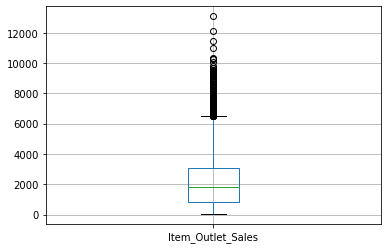

In [14]:
dfTrain.boxplot(column=['Item_Outlet_Sales'])

In [15]:
lowItem_Visibility,uppItem_Visibility=remove_outlier(dfTrain['Item_Outlet_Sales'])
dfTrain['Item_Outlet_Sales'] = np.where(dfTrain['Item_Outlet_Sales']>uppItem_Visibility,uppItem_Visibility,dfTrain['Item_Outlet_Sales'])              
dfTrain['Item_Outlet_Sales'] = np.where(dfTrain['Item_Outlet_Sales']<lowItem_Visibility,lowItem_Visibility,dfTrain['Item_Outlet_Sales'])  

<AxesSubplot:>

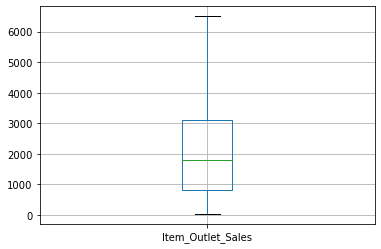

In [16]:
dfTrain.boxplot(column=['Item_Outlet_Sales'])

In [17]:
dfTrain['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2156.313016
std      1624.863069
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      6501.869900
Name: Item_Outlet_Sales, dtype: float64

In [18]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
dfTrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
dfTrain['Item_Weight'] = dfTrain['Item_Weight'].fillna(dfTrain['Item_Weight'].mean())
dfTrain['Outlet_Size'] = dfTrain['Item_Weight'].fillna(dfTrain['Outlet_Size'].mode()[0])

In [21]:
dfTrain.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,9.30,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,5.92,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,17.50,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,19.20,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,8.93,Tier 3,Supermarket Type1,994.7052


# Bivariate Analysis

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

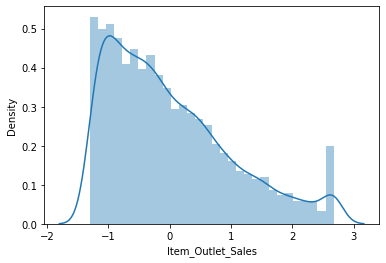

In [27]:
sns.distplot(dfTrain['Item_Outlet_Sales'])

<AxesSubplot:>

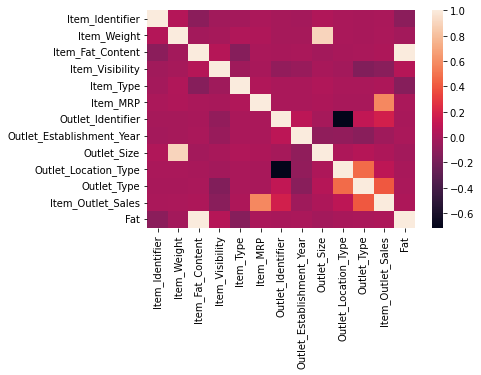

In [74]:
sns.heatmap(dfTrain.corr())

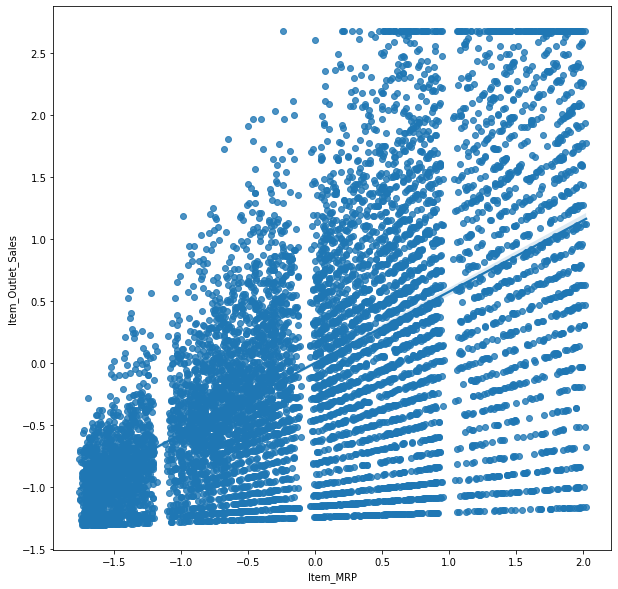

In [77]:
plt.figure(figsize=(10,10))
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=dfTrain)
plt.show()

# Multivariate Analysis

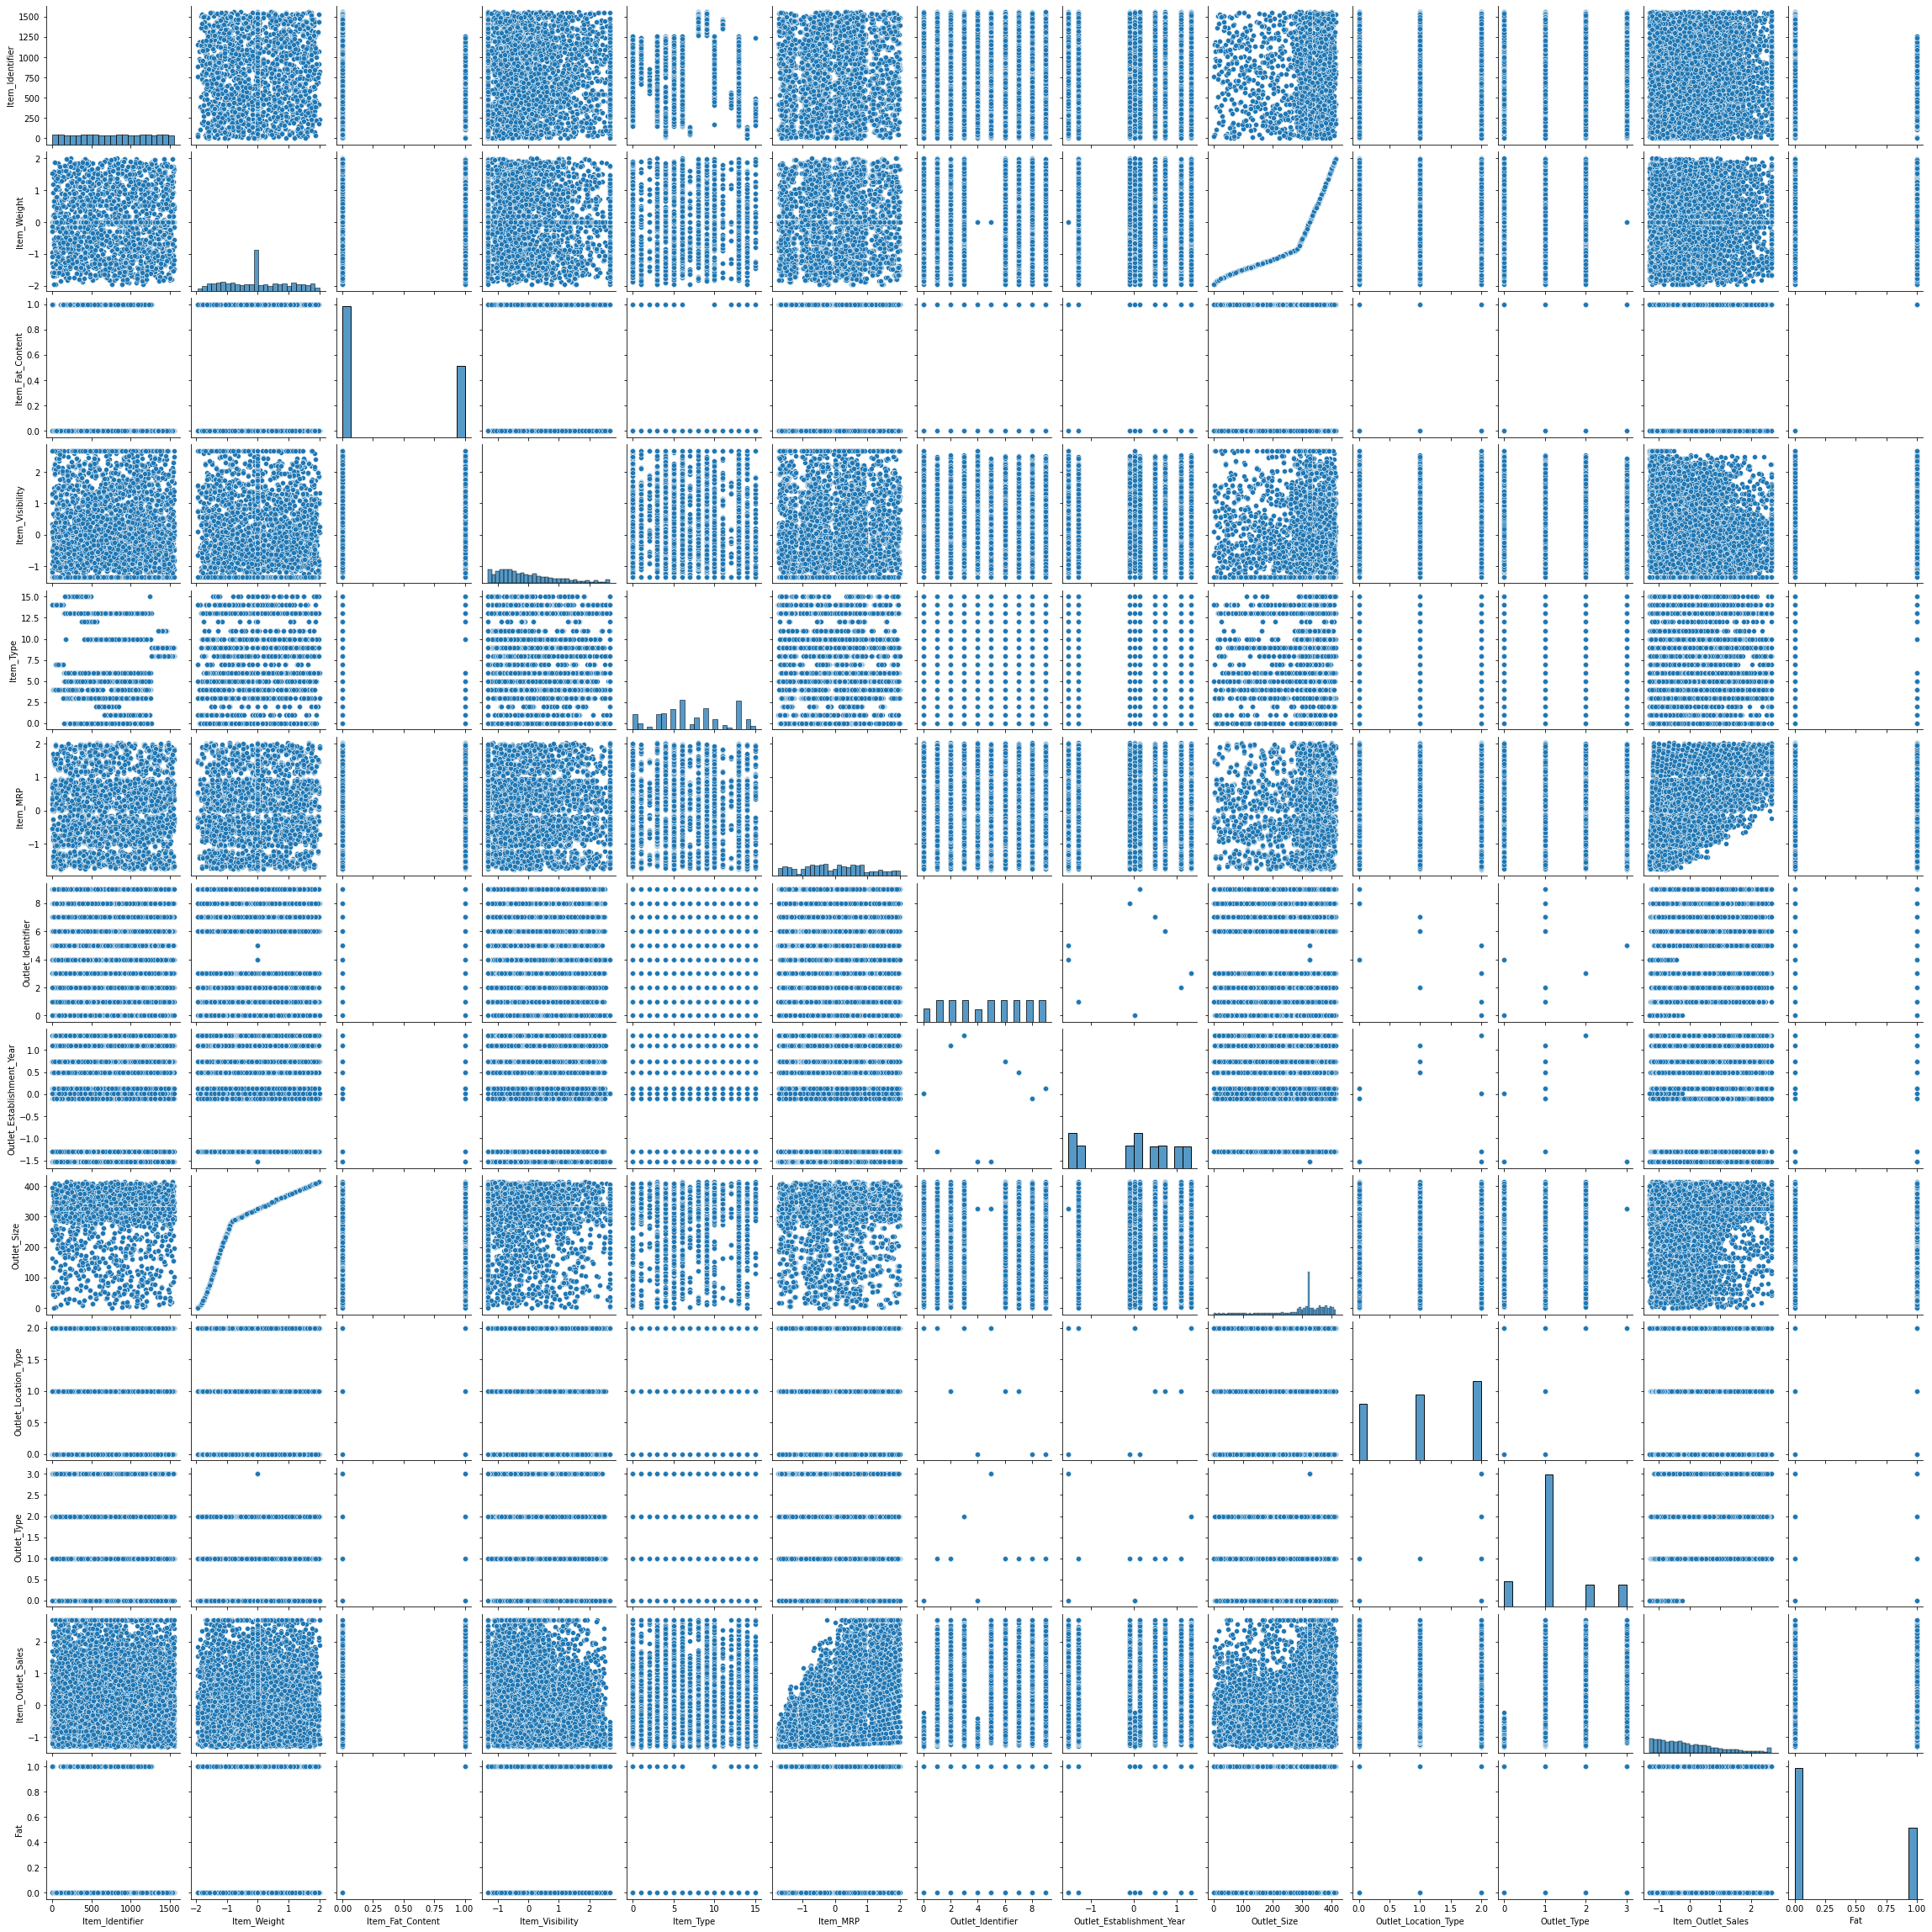

In [78]:
sns.pairplot(dfTrain)

# NORMALIZING

In [23]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [24]:
dfTrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
dfTrain['Item_Weight'] = std_scale.fit_transform(dfTrain[['Item_Weight']])
dfTrain['Item_Visibility'] = std_scale.fit_transform(dfTrain[['Item_Visibility']])
dfTrain['Item_MRP'] = std_scale.fit_transform(dfTrain[['Item_MRP']])
dfTrain['Outlet_Establishment_Year'] = std_scale.fit_transform(dfTrain[['Outlet_Establishment_Year']])
dfTrain['Item_Outlet_Sales'] = std_scale.fit_transform(dfTrain[['Item_Outlet_Sales']])

In [26]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841872,Low Fat,-1.008628,Dairy,1.747454,OUT049,0.139541,9.30,Tier 1,Supermarket Type1,0.971723
1,DRC01,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,OUT018,1.334103,5.92,Tier 3,Supermarket Type2,-1.054237
2,FDN15,1.098554,Low Fat,-0.994034,Meat,0.010040,OUT049,0.139541,17.50,Tier 1,Supermarket Type1,-0.036339
3,FDX07,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,OUT010,0.020085,19.20,Tier 3,Grocery Store,-0.876392
4,NCD19,-0.929428,Low Fat,-1.337208,Household,-1.399220,OUT013,-1.293934,8.93,Tier 3,Supermarket Type1,-0.714938


# Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [38]:
dfTrain['Item_Weight'] = std_scale.fit_transform(dfTrain[['Item_Weight']])
dfTrain['Item_Visibility'] = std_scale.fit_transform(dfTrain[['Item_Visibility']])
dfTrain['Item_MRP'] = std_scale.fit_transform(dfTrain[['Item_MRP']])
dfTrain['Outlet_Establishment_Year'] = std_scale.fit_transform(dfTrain[['Outlet_Establishment_Year']])
dfTrain['Item_Outlet_Sales'] = std_scale.fit_transform(dfTrain[['Item_Outlet_Sales']])

# Typos

In [28]:
dfTrain['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
dfTrain['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
dfTrain['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
dfTrain['Item_Fat_Content'].replace('reg','Regular',inplace=True)

dfTrain['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [30]:
pd.get_dummies(dfTrain['Item_Fat_Content']).head()

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [31]:
pd.concat([dfTrain['Item_Fat_Content'], pd.get_dummies(dfTrain['Item_Fat_Content'])], axis=1).head()

,Item_Fat_Content,Low Fat,Regular
0,Low Fat,1,0
1,Regular,0,1
2,Low Fat,1,0
3,Regular,0,1
4,Low Fat,1,0


In [32]:
dfTrain['Fat']=pd.get_dummies(dfTrain['Item_Fat_Content'], drop_first=True)

In [33]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat
0,FDA15,-0.841872,Low Fat,-1.008628,Dairy,1.747454,OUT049,0.139541,9.30,Tier 1,Supermarket Type1,0.971723,0
1,DRC01,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,OUT018,1.334103,5.92,Tier 3,Supermarket Type2,-1.054237,1
2,FDN15,1.098554,Low Fat,-0.994034,Meat,0.010040,OUT049,0.139541,17.50,Tier 1,Supermarket Type1,-0.036339,0
3,FDX07,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,OUT010,0.020085,19.20,Tier 3,Grocery Store,-0.876392,1
4,NCD19,-0.929428,Low Fat,-1.337208,Household,-1.399220,OUT013,-1.293934,8.93,Tier 3,Supermarket Type1,-0.714938,0


In [34]:
dfTrain['Fat'].corr(dfTrain['Item_Outlet_Sales'])

0.019675133952539788

In [35]:
dfTrain.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [36]:
dfTrain['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Categorical to Numerical Conversion

In [39]:
encoder = LabelEncoder()

In [40]:
dfTrain['Item_Identifier'] = encoder.fit_transform(dfTrain['Item_Identifier'])

dfTrain['Item_Fat_Content'] = encoder.fit_transform(dfTrain['Item_Fat_Content'])

dfTrain['Item_Type'] = encoder.fit_transform(dfTrain['Item_Type'])

dfTrain['Outlet_Identifier'] = encoder.fit_transform(dfTrain['Outlet_Identifier'])

dfTrain['Outlet_Size'] = encoder.fit_transform(dfTrain['Outlet_Size'])

dfTrain['Outlet_Location_Type'] = encoder.fit_transform(dfTrain['Outlet_Location_Type'])

dfTrain['Outlet_Type'] = encoder.fit_transform(dfTrain['Outlet_Type'])

In [41]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat
0,156,-0.841872,0,-1.008628,4,1.747454,9,0.139541,284,0,1,0.971723,0
1,8,-1.641706,1,-0.942473,14,-1.489023,3,1.334103,57,2,2,-1.054237,1
2,662,1.098554,0,-0.994034,10,0.010040,9,0.139541,376,0,1,-0.036339,0
3,1121,1.500838,1,-1.337208,6,0.660050,0,0.020085,393,2,0,-0.876392,1
4,1297,-0.929428,0,-1.337208,9,-1.399220,1,-1.293934,265,2,1,-0.714938,0


In [42]:
x = dfTrain.drop(columns='Item_Outlet_Sales', axis=1)
y = dfTrain['Item_Outlet_Sales']

In [43]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156    -0.841872                 0        -1.008628   
1                   8    -1.641706                 1        -0.942473   
2                 662     1.098554                 0        -0.994034   
3                1121     1.500838                 1        -1.337208   
4                1297    -0.929428                 0        -1.337208   
...               ...          ...               ...              ...   
8518              370    -1.418084                 0        -0.174527   
8519              897    -1.059578                 1        -0.375209   
8520             1357    -0.534243                 0        -0.616744   
8521              681    -1.336444                 1         1.636290   
8522               50     0.459634                 0        -0.418293   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  1.747454                  9    

In [44]:
print(y)

0       0.971723
1      -1.054237
2      -0.036339
3      -0.876392
4      -0.714938
          ...   
8518    0.382867
8519   -0.989082
8520   -0.592823
8521   -0.191237
8522   -0.855903
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting data into test and train data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [46]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 12) (6818, 12) (1705, 12)


# Machine Learning Model Training

# Linear Regression

In [61]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=regressor.predict(x_test)

# Evaluation

In [64]:
print("Train accuracy:", regressor.score(x_train, y_train) * 100)
print("Test accuracy:", regressor.score(x_test, y_test) * 100)

Train accuracy: 50.75674332205256
Test accuracy: 52.08560463428653


# Regularized Linear Regression

In [68]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-1.12267001e-05  3.48610538e-02  1.47160198e-02 -4.31186997e-02
 -3.57100221e-04  5.81663388e-01  3.64105188e-02 -9.24509566e-03
 -4.50046179e-04 -3.67244311e-02  5.00553084e-01  1.47160198e-02]


# Evaluation

In [70]:
print("Train accuracy:", ridge.score(x_train, y_train) * 100)
print("Test accuracy:", ridge.score(x_test, y_test) * 100)

Train accuracy: 50.75674302350518
Test accuracy: 52.08571085374395


# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfg=RandomForestRegressor()

In [81]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
predicted=rfg.predict(x_test)

# Evaluation 

In [89]:
print("MEAN SQUARED ERROR",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",rfg.score(x_test,y_test)*100)

MEAN SQUARED ERROR 0.4002291200627571
MEAN ABSOLUTE ERROR 0.46008608003570534
ROOT MEAN SQUARED 0.6326366414165062
SCORE 58.280010199627895


# XGBoost Regressor

In [47]:
regressor = XGBRegressor()

In [48]:
regressor.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Model Evaluation

In [49]:
prediction = regressor.predict(x_train)

In [50]:
r2_train = metrics.r2_score(y_train,prediction)

In [52]:
prediction = regressor.predict(x_test)

In [53]:
r2_test = metrics.r2_score(y_test,prediction)

In [67]:
print('Train Accuracy = ', r2_train*100)
print("Test Accuracy",r2_test*100)

Train Accuracy =  85.47578031003142
Test Accuracy 56.06139560253538
